In [2]:
import os
import geopandas as gpd
import pandas as pd
import sys
import seaborn as sns
# Add project root to Python path
project_root = "/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work"
if project_root not in sys.path:
    sys.path.append(project_root)

from geofunctions import utils
import matplotlib.pyplot as plt

In [4]:
df_hours_202203 = pd.read_csv(utils.get_path("processed", "dwells", f"samples/df_hours_{202203}.csv"))

In [5]:
df_hours_202203.head()

,Unnamed: 0,identifier,identifier_type,timestamp,local_date_time,province,classification,duration_seconds,centroid_latitude,centroid_longitude,...,predicted_location_type,is_working_hours,flag_work_hours_day,flag_remote_work,smoothed_prob_office,smoothed_prob_home,smoothed_prob_3rdplace,predicted_location_type_smooth_prob,flag_remote_work_smooth_prob,flag_remote_work_min_work_prob
0,0,3569613b-802c-4d32-8053-703fd6c9b7f2,GAID,2022-03-22 13:09:08,2022-03-22 15:09:08,HaDarom,AREA_DWELL,3080.0,31.870462,34.688117,...,work,True,True,False,0.503332,0.0,-4.658610e-17,smoothed_prob_office,False,False
1,1,3569613b-802c-4d32-8053-703fd6c9b7f2,GAID,2022-03-22 13:09:08,2022-03-22 15:09:08,HaDarom,AREA_DWELL,3080.0,31.870462,34.688117,...,work,True,True,False,0.431180,0.0,-5.053153e-17,smoothed_prob_office,False,False
2,2,89e2392b-18c3-4f9f-a805-af463e3bfca5,GAID,2022-03-18 09:46:31,2022-03-18 11:46:31,HaDarom,AREA_DWELL,2574.0,31.778584,34.710535,...,other,True,False,False,0.000000,0.0,2.074148e-01,smoothed_prob_3rdplace,False,False
3,3,89e2392b-18c3-4f9f-a805-af463e3bfca5,GAID,2022-03-18 09:46:31,2022-03-18 11:46:31,HaDarom,AREA_DWELL,2574.0,31.778584,34.710535,...,other,True,False,False,0.000000,0.0,2.161389e-01,smoothed_prob_3rdplace,False,False
4,4,967427f6-be75-4736-b271-2028b51594ca,GAID,2022-03-10 09:25:22,2022-03-10 11:25:22,HaDarom,AREA_DWELL,4019.0,31.803318,34.762033,...,work,True,True,False,0.669363,0.0,0.000000e+00,smoothed_prob_office,False,False


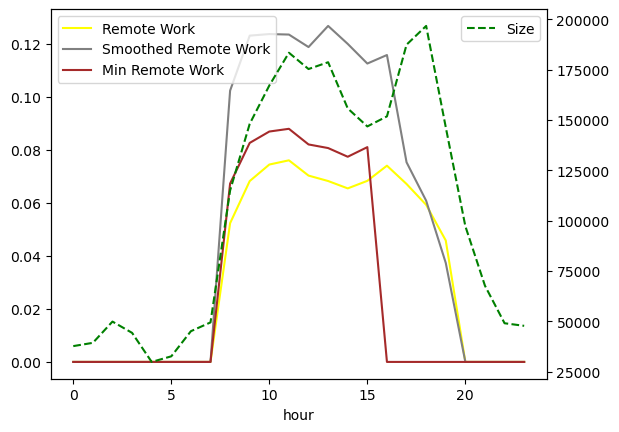

In [54]:
fig, ax1 = plt.subplots()

# Plotting home and work means on the first axis
# df_hours_202203.groupby('hour')['home'].mean().plot(ax=ax1, color='blue', label='Home')
# df_hours_202203.groupby('hour')['work'].mean().plot(ax=ax1, color='orange', label='Work')
# df_hours_202203.groupby('hour')['other'].mean().plot(ax=ax1, color='black', label='3rd place')
df_hours_202203.groupby('hour')['flag_remote_work'].mean().plot(ax=ax1, color='yellow', label='Remote Work')
df_hours_202203.groupby('hour')['flag_remote_work_smooth_prob'].mean().plot(ax=ax1, color='grey', label='Smoothed Remote Work')
df_hours_202203.groupby('hour')['flag_remote_work_min_work_prob'].mean().plot(ax=ax1, color='brown', label='Min Remote Work')

# Creating a second axis for the size plot
ax2 = ax1.twinx()
df_hours_202203.groupby('hour').size().plot(ax=ax2, color='green', label='Size', linestyle='--')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [10]:
df_hours_202203.groupby('identifier')['flag_remote_work'].mean()[df_hours_202203.groupby('identifier')['flag_remote_work'].mean()>0.3]

identifier
0329b7c8-b7c8-f802-e212-255fd85960e6    0.307692
0f62fb67-cd0a-4090-b44a-19845184994f    0.354839
15fd3083-7404-4381-8a96-df402f3af85f    0.434783
1b2e2861-ee51-4d3f-a181-1f19fd4fb722    0.314815
20164672-7450-45f7-80ce-2efb2961b32c    0.305085
309d5db8-02d1-4b06-8f3d-82bc6c35e2f5    0.470588
36c032ae-3fba-4d00-aaa9-1eb2142f826f    0.307018
3bf2a43b-b039-42d6-900f-c4b0edc30e01    0.321267
4615fab3-e076-4574-8127-ed7fc68dafef    0.304348
4e7c1157-72ad-4135-b85e-0f0907d4a626    0.308642
5dd51171-c3c7-47e6-a0f8-f805ad1bdeaa    0.393939
5e340bf8-7955-4642-b559-4d5f7129f70b    0.304348
625f2fac-f445-49fe-b403-4e67d146f31e    0.321212
652d9436-0783-408f-86a2-f3f53ce71751    0.392523
7058701b-701b-7938-6230-c11a6e6e9b9e    0.321429
7c23be8d-d9ea-442d-9a3c-c13fd8b9b05b    0.341935
83b60bd0-8754-4b9e-996a-7ca65514325e    0.314815
8505fe6d-a3e0-497d-bf0b-036246ed2e9e    0.384615
90a35763-84d5-47f2-8e15-2ed639a84d76    0.320513
94d6d1e4-ecd2-4d52-a164-d2e032aae7cd    0.302326
b41d41d4-

In [38]:
df_hours_202203.groupby(['identifier','date'])['office_day'].max().groupby(level=0).sum().describe()

count    22050.000000
mean         5.430249
std          3.836239
min          2.000000
25%          3.000000
50%          4.000000
75%          7.000000
max         30.000000
Name: office_day, dtype: float64

In [39]:
office_days_dist = df_hours_202203.groupby(['identifier','date'])['office_day'].max().groupby(level=0).sum()
office_days_dist[office_days_dist==30]

identifier
09ed3d05-c435-4480-8dfc-6941696f45bc    30
1b4dcace-cace-234c-f751-767ce7c60bfd    30
2f5776f5-76f5-5073-ae74-11b816bd6f47    30
4d5c12ac-181e-4772-9b0c-bd29383828d2    30
b8532c80-8c68-4cba-8f7d-e3aef6c52854    30
Name: office_day, dtype: int64

In [46]:
df_hours_202203[df_hours_202203.identifier=='09ed3d05-c435-4480-8dfc-6941696f45bc'].groupby(['identifier','date','office_day','flag_weekend','location_type']).size().head(20)

identifier                            date        office_day  flag_weekend  location_type
09ed3d05-c435-4480-8dfc-6941696f45bc  2022-03-01  True        False         home              4
                                                                            other             2
                                                                            work             14
                                      2022-03-02  True        False         home              3
                                                                            other             3
                                                                            work              7
                                      2022-03-03  True        False         home             11
                                                                            other             5
                                                                            work              6
                                      2022-03-

### It is a mistake but minor

In [47]:
df_hours_202203[df_hours_202203.flag_weekend]['office_day'].mean()

np.float64(0.042167815218643157)

<Axes: >

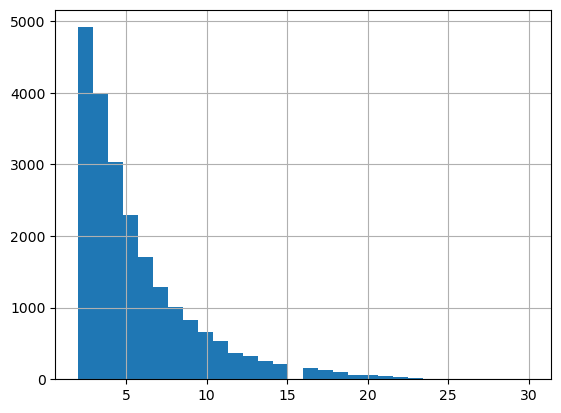

In [37]:
df_hours_202203.groupby(['identifier','date'])['office_day'].max().groupby(level=0).sum().hist(bins=30)

In [14]:
one_user_hours = df_hours_202203[df_hours_202203.identifier=='0f62fb67-cd0a-4090-b44a-19845184994f']

In [17]:
one_user_hours.columns

Index(['Unnamed: 0', 'identifier', 'identifier_type', 'timestamp',
       'local_date_time', 'province', 'classification', 'duration_seconds',
       'centroid_latitude', 'centroid_longitude', 'bump_count',
       'potential_start_time', 'potential_end_time', 'month', 'the_geom',
       'frequency', 'duration_hours', 'geohash', 'date', 'start_date_time',
       'end_date_time', 'flag_night', 'flag_work_hours', 'geohash_home',
       'geohash_work', 'geometry_work', 'distance_work', 'flag_work_geohash',
       'geometry_home', 'distance_home', 'flag_home_geohash',
       'flag_other_geohash', 'location_type', 'hours_in_interval', 'hour',
       'flag_weekend', 'work_location_hours', 'office_day',
       'prob_home_at_hour', 'prob_office_at_hour', 'prob_3rdplace_at_hour',
       'home', 'other', 'work', 'predicted_location_type', 'is_working_hours',
       'flag_work_hours_day', 'flag_remote_work', 'smoothed_prob_office',
       'smoothed_prob_home', 'smoothed_prob_3rdplace',
       'pre

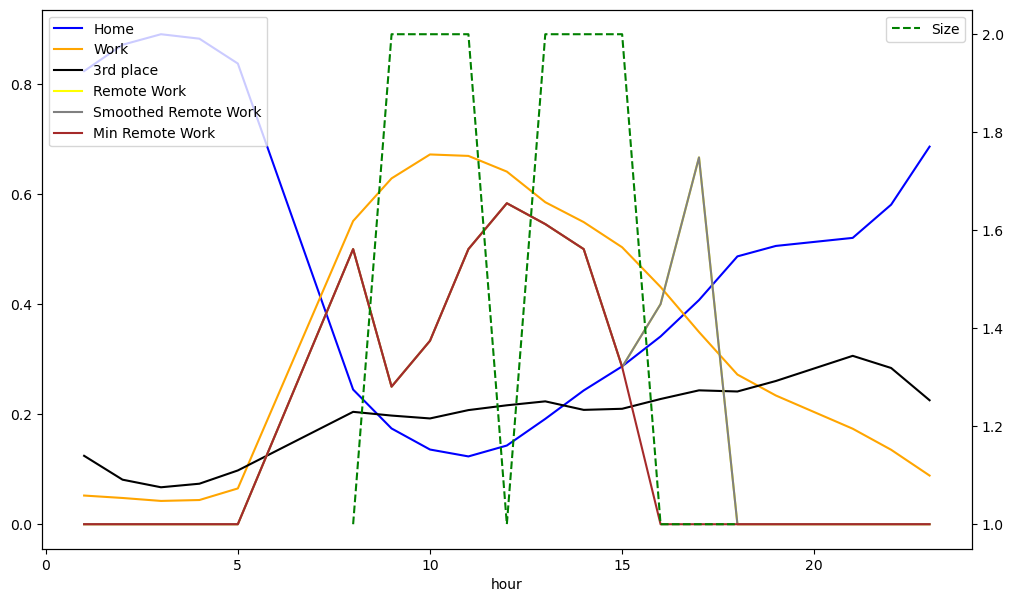

In [51]:
fig, ax1 = plt.subplots(figsize=(12,7))

# Plotting home and work means on the first axis
one_user_hours.groupby('hour')['home'].mean().plot(ax=ax1, color='blue', label='Home')
one_user_hours.groupby('hour')['work'].mean().plot(ax=ax1, color='orange', label='Work')
one_user_hours.groupby('hour')['other'].mean().plot(ax=ax1, color='black', label='3rd place')
one_user_hours.groupby('hour')['flag_remote_work'].mean().plot(ax=ax1, color='yellow', label='Remote Work')
one_user_hours.groupby('hour')['flag_remote_work_smooth_prob'].mean().plot(ax=ax1, color='grey', label='Smoothed Remote Work')
one_user_hours.groupby('hour')['flag_remote_work_min_work_prob'].mean().plot(ax=ax1, color='brown', label='Min Remote Work')
# Creating a second axis for the size plot
ax2 = ax1.twinx()
one_user_hours[one_user_hours.office_day].groupby('hour').size().plot(ax=ax2, color='green', label='Size', linestyle='--')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [49]:
0.341246+0.227574+0.431180

1.0

In [53]:
one_user_hours_clean = one_user_hours[['timestamp','hour', 'location_type',
       'flag_weekend', 'work_location_hours', 'office_day',
       'prob_home_at_hour', 'prob_office_at_hour', 'prob_3rdplace_at_hour',
       'home', 'other', 'work', 'predicted_location_type',
       'flag_work_hours_day',  'smoothed_prob_office',
       'smoothed_prob_home', 'smoothed_prob_3rdplace','flag_remote_work',
        'flag_remote_work_smooth_prob',
       'flag_remote_work_min_work_prob']].sort_values(['timestamp','hour'])
one_user_hours_clean[(one_user_hours_clean.hour>15)&(one_user_hours_clean.hour<21)]

,timestamp,hour,location_type,flag_weekend,work_location_hours,office_day,prob_home_at_hour,prob_office_at_hour,prob_3rdplace_at_hour,home,other,work,predicted_location_type,flag_work_hours_day,smoothed_prob_office,smoothed_prob_home,smoothed_prob_3rdplace,flag_remote_work,flag_remote_work_smooth_prob,flag_remote_work_min_work_prob
2065338,2022-03-02 13:35:17,16,home,False,0,False,0.0,1.0,0.0,0.341246,0.227574,0.431180,work,True,0.431180,0.000000,0.000000,True,True,False
2065339,2022-03-02 13:35:17,17,home,False,0,False,0.0,1.0,0.0,0.407369,0.243304,0.349326,work,True,0.349326,0.000000,0.000000,True,True,False
2128833,2022-03-15 15:06:59,17,home,False,0,False,0.0,1.0,0.0,0.407369,0.243304,0.349326,work,True,0.349326,0.000000,0.000000,True,True,False
2128834,2022-03-15 15:06:59,18,home,False,0,False,1.0,0.0,0.0,0.486767,0.241232,0.272001,home,True,0.000000,0.486767,0.000000,False,False,False
1110044,2022-03-19 16:08:53,18,home,True,0,False,0.0,0.0,1.0,0.486767,0.241232,0.272001,other,False,0.000000,0.000000,0.241232,False,False,False
1110045,2022-03-19 16:08:53,19,home,True,0,False,0.0,0.0,1.0,0.505768,0.260292,0.233940,other,False,0.000000,0.000000,0.260292,False,False,False
311966,2022-03-22 11:21:24,16,work,False,10,True,0.0,1.0,0.0,0.341246,0.227574,0.431180,work,True,0.431180,0.000000,0.000000,False,False,False
91161,2022-03-22 15:20:17,17,work,False,10,True,0.0,1.0,0.0,0.407369,0.243304,0.349326,work,True,0.349326,0.000000,0.000000,False,False,False
1683946,2022-03-22 15:38:43,18,home,False,10,True,1.0,0.0,0.0,0.486767,0.241232,0.272001,home,True,0.000000,0.486767,0.000000,False,False,False
362899,2022-03-23 10:08:26,16,home,False,0,False,0.0,1.0,0.0,0.341246,0.227574,0.431180,work,True,0.431180,0.000000,0.000000,True,True,False


It seems we can conclude probability only when there are 2 office days in specific hour

In [58]:
df_freq_hours_users = (df_hours_202203[df_hours_202203.office_day].groupby(['identifier','hour']).size()[df_hours_202203[df_hours_202203.office_day].groupby(['identifier','hour']).size()>1]).reset_index()

In [62]:
df_freq_hours_users['office_day']=True

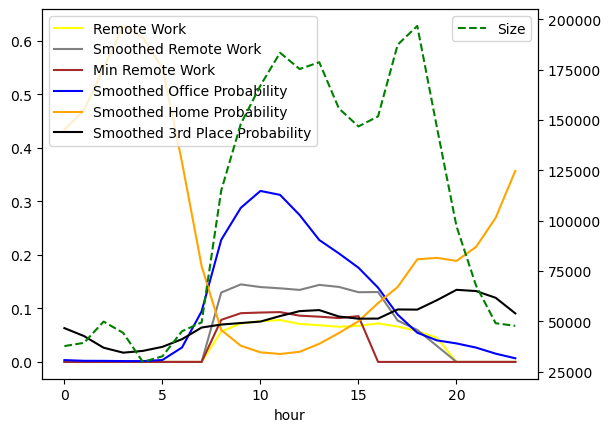

In [71]:
fig, ax1 = plt.subplots()

# Plotting home and work means on the first axis
# df_hours_202203.groupby('hour')['home'].mean().plot(ax=ax1, color='blue', label='Home')
# df_hours_202203.groupby('hour')['work'].mean().plot(ax=ax1, color='orange', label='Work')
# df_hours_202203.groupby('hour')['other'].mean().plot(ax=ax1, color='black', label='3rd place')
df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['flag_remote_work'].mean().plot(ax=ax1, color='yellow', label='Remote Work')
df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['flag_remote_work_smooth_prob'].mean().plot(ax=ax1, color='grey', label='Smoothed Remote Work')
df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['flag_remote_work_min_work_prob'].mean().plot(ax=ax1, color='brown', label='Min Remote Work')
df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['smoothed_prob_office'].mean().plot(ax=ax1, color='blue', label='Smoothed Office Probability')
df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['smoothed_prob_home'].mean().plot(ax=ax1, color='orange', label='Smoothed Home Probability')
df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['smoothed_prob_3rdplace'].mean().plot(ax=ax1, color='black', label='Smoothed 3rd Place Probability')
# Creating a second axis for the size plot
ax2 = ax1.twinx()
df_hours_202203.groupby('hour').size().plot(ax=ax2, color='green', label='Size', linestyle='--')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## Use probability instead of flag

In [75]:
df_hours_202203.columns

Index(['Unnamed: 0', 'identifier', 'identifier_type', 'timestamp',
       'local_date_time', 'province', 'classification', 'duration_seconds',
       'centroid_latitude', 'centroid_longitude', 'bump_count',
       'potential_start_time', 'potential_end_time', 'month', 'the_geom',
       'frequency', 'duration_hours', 'geohash', 'date', 'start_date_time',
       'end_date_time', 'flag_night', 'flag_work_hours', 'geohash_home',
       'geohash_work', 'geometry_work', 'distance_work', 'flag_work_geohash',
       'geometry_home', 'distance_home', 'flag_home_geohash',
       'flag_other_geohash', 'location_type', 'hours_in_interval', 'hour',
       'flag_weekend', 'work_location_hours', 'office_day',
       'prob_home_at_hour', 'prob_office_at_hour', 'prob_3rdplace_at_hour',
       'home', 'other', 'work', 'predicted_location_type', 'is_working_hours',
       'flag_work_hours_day', 'flag_remote_work', 'smoothed_prob_office',
       'smoothed_prob_home', 'smoothed_prob_3rdplace',
       'pre

In [76]:
df_hours_202203['remote_work_smooth_prob']  = df_hours_202203['smoothed_prob_office']*df_hours_202203['flag_home_geohash']*(1-df_hours_202203['office_day'])

In [77]:
df_hours_202203['remote_work_prob']  = df_hours_202203['prob_office_at_hour']*df_hours_202203['flag_home_geohash']*(1-df_hours_202203['office_day'])

In [80]:
df_hours_202203['flag_remote_work_smoothed']  = df_hours_202203['flag_remote_work']*df_hours_202203['work']

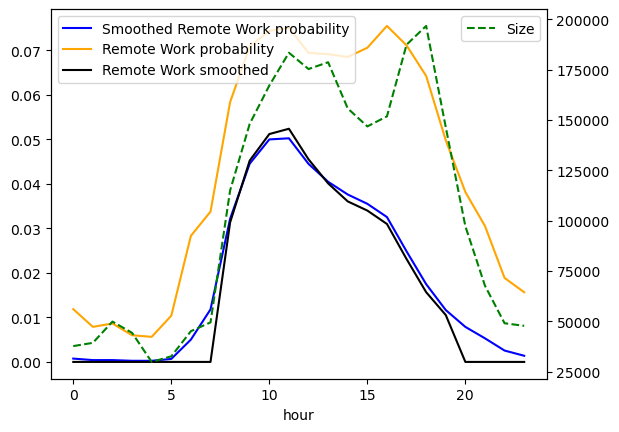

In [82]:
fig, ax1 = plt.subplots()

# Plotting home and work means on the first axis
# df_hours_202203.groupby('hour')['home'].mean().plot(ax=ax1, color='orange', label='Home', linestyle='--')
# df_hours_202203.groupby('hour')['work'].mean().plot(ax=ax1, color='blue', label='Work', linestyle='--')
# df_hours_202203.groupby('hour')['other'].mean().plot(ax=ax1, color='black', label='3rd place', linestyle='--')
# df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['flag_remote_work'].mean().plot(ax=ax1, color='yellow', label='Remote Work')
# df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['flag_remote_work_smooth_prob'].mean().plot(ax=ax1, color='grey', label='Smoothed Remote Work')
# df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['flag_remote_work_min_work_prob'].mean().plot(ax=ax1, color='brown', label='Min Remote Work')
df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['remote_work_smooth_prob'].mean().plot(ax=ax1, color='blue', label='Smoothed Remote Work probability')
df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['remote_work_prob'].mean().plot(ax=ax1, color='orange', label='Remote Work probability')
df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['flag_remote_work_smoothed'].mean().plot(ax=ax1, color='black', label='Remote Work smoothed')
# Creating a second axis for the size plot
ax2 = ax1.twinx()
df_hours_202203.groupby('hour').size().plot(ax=ax2, color='green', label='Size', linestyle='--')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## Without filtering number of office days. Doesnt bring any change

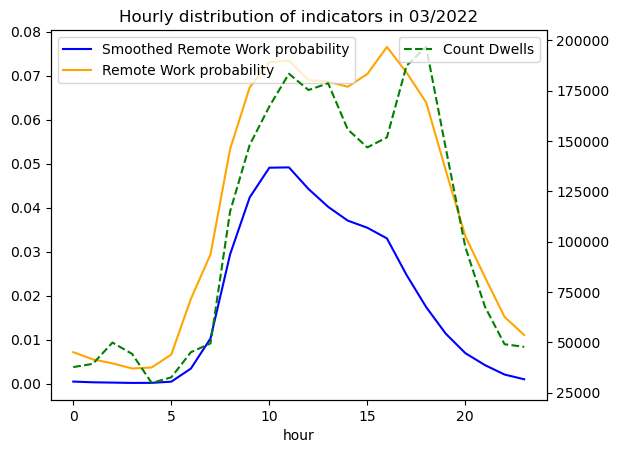

In [120]:
fig, ax1 = plt.subplots()

# Plotting home and work means on the first axis
# df_hours_202203.groupby('hour')['home'].mean().plot(ax=ax1, color='orange', label='Home', linestyle='--')
# df_hours_202203.groupby('hour')['work'].mean().plot(ax=ax1, color='blue', label='Work', linestyle='--')
# df_hours_202203.groupby('hour')['other'].mean().plot(ax=ax1, color='black', label='3rd place', linestyle='--')
# df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['flag_remote_work'].mean().plot(ax=ax1, color='yellow', label='Remote Work')
# df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['flag_remote_work_smooth_prob'].mean().plot(ax=ax1, color='grey', label='Smoothed Remote Work')
# df_hours_202203.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner').groupby('hour')['flag_remote_work_min_work_prob'].mean().plot(ax=ax1, color='brown', label='Min Remote Work')
df_hours_202203.groupby('hour')['remote_work_smooth_prob'].mean().plot(ax=ax1, color='blue', label='Smoothed Remote Work probability')
df_hours_202203.groupby('hour')['remote_work_prob'].mean().plot(ax=ax1, color='orange', label='Remote Work probability')
# df_hours_202203.groupby('hour')['flag_remote_work_smoothed'].mean().plot(ax=ax1, color='black', label='Remote Work smoothed')
# Creating a second axis for the size plot
ax2 = ax1.twinx()
df_hours_202203.groupby('hour').size().plot(ax=ax2, color='green', label='Count Dwells', linestyle='--')
plt.title("Hourly distribution of indicators in 03/2022")
# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

### Another mistake. All flags should be zero in the office day

In [67]:
df_hours_202203[df_hours_202203.office_day]['flag_remote_work_smooth_prob'].mean()

np.float64(0.04905714114225794)

In [68]:
df_hours_202203[df_hours_202203.office_day]['flag_remote_work'].mean()

np.float64(0.0)

<Axes: >

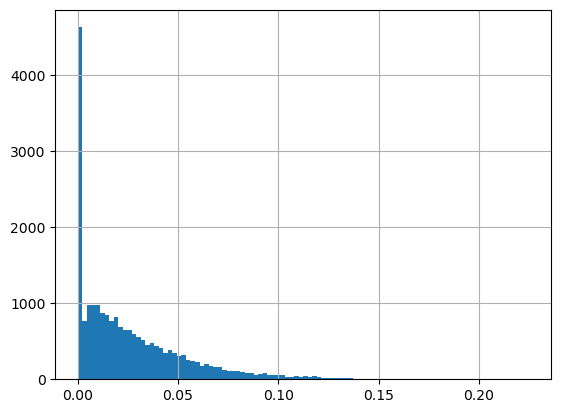

In [86]:
df_hours_202203.groupby('identifier')['flag_remote_work_smoothed'].mean().hist(bins=100)

# I like flag_remote_work_smoothed. I will try to calculate it for other months

How to aggregate by user and month?

## Potential Metrics

In [98]:
# Calculate the average of smoothed remote work flags for each user on work hours days
df_hours_202203[df_hours_202203.flag_work_hours_day].groupby(['identifier','date'])['flag_remote_work_smoothed'].sum().groupby('identifier').mean().mean()

np.float64(0.2785263755747883)

In [99]:
df_hours_202203[df_hours_202203.flag_work_hours_day].groupby(['identifier','date'])['remote_work_smooth_prob'].sum().groupby('identifier').mean().mean()

np.float64(0.27454243021080965)

In [103]:
# Calculate the average of the maximum smoothed remote work flags for each user on work hours days
df_hours_202203[df_hours_202203.flag_work_hours_day].groupby(['identifier','date'])['flag_remote_work_smoothed'].max().groupby('identifier').mean().mean()

np.float64(0.15331563601120718)

In [104]:
# Calculate the proportion of users with a maximum smoothed remote work flag greater than 0.5 on work hours days
df_hours_202203[df_hours_202203.flag_work_hours_day].groupby(['identifier','date'])['flag_remote_work_smoothed'].apply(lambda x: max(x)>0.5).groupby('identifier').mean().mean()

np.float64(0.19745052596349322)

In [116]:
import pandas as pd
# import utils  # Assuming utils is a module that contains the get_path function

# List of months to process
months = ['201901', '201909', '202004','202009','202107',  '202203', '202204']

# Initialize a list to store results
results = dict()

# Iterate through each month
for month in months:
    # Read the CSV file for the current month
    df_hours = pd.read_csv(utils.get_path("processed", "dwells", f"samples/df_hours_{month}.csv"))
    df_hours["is_working_hours"] = (df_hours["hour"] >= 8) & (df_hours["hour"] <= 19)
    df_hours['flag_remote_work'] = ((df_hours["location_type"] == "home")
        & (df_hours["flag_work_hours"])
        & (~df_hours["office_day"])
        & (df_hours["is_working_hours"])  # New condition
    )
    df_freq_hours_users = (df_hours[df_hours.office_day].groupby(['identifier','hour']).size()[df_hours[df_hours.office_day].groupby(['identifier','hour']).size()>1]).reset_index()
    df_hours =df_hours.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner')
    if 'work' not in df_hours.columns:
        general_probability = pd.pivot_table(
            df_hours[(df_hours["office_day"]) & (~df_hours.flag_weekend)],
            index="hour",
            columns="location_type",
            values="flag_work_hours",  # Bug fix 4: Specify values column
            aggfunc="count",
            fill_value=0,
        ).div(
            df_hours[(df_hours["office_day"]) & (~df_hours.flag_weekend)]
            .groupby("hour")
            .size(),
            axis=0,
        )

        df_hours = df_hours.merge(
            general_probability.reset_index(), on="hour", how="left"
        ).fillna(0)
    
    df_hours = df_hours[df_hours['identifier_type']=='GAID']

    df_hours['flag_remote_work_smoothed']  = df_hours['flag_remote_work']*df_hours['work']
    # df_hours['remote_work_smooth_prob']  = df_hours['smoothed_prob_office']*df_hours['flag_home_geohash']*(1-df_hours['office_day'])
    # Calculate the metrics
    # metric 1 is wrong because it depends on number of signals during the day
    metric_1 = df_hours[df_hours['flag_work_hours_day']].groupby(['identifier', 'date'])['flag_remote_work_smoothed'].sum().groupby('identifier').mean().mean()
    # metric_2 = df_hours[df_hours['flag_work_hours_day']].groupby(['identifier', 'date'])['remote_work_smooth_prob'].sum().groupby('identifier').mean().mean()
    metric_3 = df_hours[df_hours['flag_work_hours_day']].groupby(['identifier', 'date'])['flag_remote_work_smoothed'].max().groupby('identifier').mean().mean()
    metric_4 = df_hours[df_hours['flag_work_hours_day']].groupby(['identifier', 'date'])['flag_remote_work_smoothed'].apply(lambda x: max(x) > 0.5).groupby('identifier').mean().mean()

    # Store the results
    results[month] = {
        'metric_1': metric_1,
        # 'metric_2': metric_2,
        'metric_3': metric_3,
        'metric_4': metric_4
    }

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

            201901    201909    202004    202009    202107    202203    202204
metric_1  0.244278  0.256798  0.496787  0.471758  0.249488  0.278609  0.241498
metric_3  0.091055  0.144437  0.159739  0.170068  0.136904  0.153349  0.134518
metric_4  0.122321  0.170865  0.233650  0.232470  0.171580  0.197214  0.168096


In [117]:
import pandas as pd
# import utils  # Assuming utils is a module that contains the get_path function

# List of months to process
months = ['201901', '201909', '202004','202009','202107',  '202203', '202204']

# Initialize a list to store results
results = dict()

# Iterate through each month
for month in months:
    # Read the CSV file for the current month
    df_hours = pd.read_csv(utils.get_path("processed", "dwells", f"samples/df_hours_{month}.csv"))
    df_hours["is_working_hours"] = (df_hours["hour"] >= 8) & (df_hours["hour"] <= 19)
    df_hours['flag_remote_work'] = ((df_hours["location_type"] == "home")
        & (df_hours["flag_work_hours"])
        & (~df_hours["office_day"])
        & (df_hours["is_working_hours"])  # New condition
    )
    df_freq_hours_users = (df_hours[df_hours.office_day].groupby(['identifier','hour']).size()[df_hours[df_hours.office_day].groupby(['identifier','hour']).size()>1]).reset_index()
    df_hours =df_hours.merge(df_freq_hours_users, on=['identifier', 'hour'], how='inner')
    if 'work' not in df_hours.columns:
        general_probability = pd.pivot_table(
            df_hours[(df_hours["office_day"]) & (~df_hours.flag_weekend)],
            index="hour",
            columns="location_type",
            values="flag_work_hours",  # Bug fix 4: Specify values column
            aggfunc="count",
            fill_value=0,
        ).div(
            df_hours[(df_hours["office_day"]) & (~df_hours.flag_weekend)]
            .groupby("hour")
            .size(),
            axis=0,
        )

        df_hours = df_hours.merge(
            general_probability.reset_index(), on="hour", how="left"
        ).fillna(0)
    
    df_hours = df_hours[df_hours['identifier_type']=='GAID']

    df_hours['flag_remote_work_smoothed']  = df_hours['flag_remote_work']*df_hours['work']
    # df_hours['remote_work_smooth_prob']  = df_hours['smoothed_prob_office']*df_hours['flag_home_geohash']*(1-df_hours['office_day'])
    # Calculate the metrics
    # metric 1 is wrong because it depends on number of signals during the day
    metric_1 = df_hours[df_hours['flag_work_hours_day']].groupby(['identifier', 'date'])['flag_remote_work_smoothed'].sum().groupby('identifier').mean().mean()
    # metric_2 = df_hours[df_hours['flag_work_hours_day']].groupby(['identifier', 'date'])['remote_work_smooth_prob'].sum().groupby('identifier').mean().mean()
    metric_3 = df_hours[df_hours['flag_work_hours_day']].groupby(['identifier', 'date'])['flag_remote_work_smoothed'].max().groupby('identifier').mean().mean()
    metric_4 = df_hours[df_hours['flag_work_hours_day']].groupby(['identifier', 'date'])['flag_remote_work_smoothed'].apply(lambda x: max(x) > 0.5).groupby('identifier').mean().mean()

    # Store the results
    results[month] = {
        'metric_1': metric_1,
        # 'metric_2': metric_2,
        'metric_3': metric_3,
        'metric_4': metric_4
    }

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

            201901    201909    202004    202009    202107    202203    202204
metric_1  0.137632  0.165148  0.280895  0.281445  0.160141  0.213075  0.174228
metric_3  0.068703  0.099653  0.124618  0.131307  0.098124  0.125992  0.105711
metric_4  0.087986  0.118579  0.174611  0.167150  0.125601  0.163971  0.134057


In [121]:
election_days = ["2019-04-09", "2021-03-23", "2022-11-01", "2024-02-27"]
pd.to_datetime(election_days).date

array([datetime.date(2019, 4, 9), datetime.date(2021, 3, 23),
       datetime.date(2022, 11, 1), datetime.date(2024, 2, 27)],
      dtype=object)